# PREAMBLE

#### Some prelimiar configurations are made here, before importing the libraries and starting the code.

### Plot configs

In [1]:
plotpars = {'axes.labelsize': 18,
            'axes.linewidth': 1.,
            'figure.figsize': (7.,5.),
            'font.size': 20,
            'legend.frameon': True,
            'legend.framealpha': 0.85,
            'legend.edgecolor': 'black',
            'legend.loc': 'best',
            'legend.fontsize': 12,
            'mathtext.fontset': 'stixsans',
            'savefig.bbox': 'tight',
            'xtick.labelsize': 18,
            'ytick.labelsize': 18,
           }

plotpars_2cols = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (15, 4.),
                  'font.size': 12,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 12,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                 }

plotpars_3rows = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (6, 9),
                  'font.size': 12,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 12,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                 }

plotpars_3cols = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (12, 3.5),
                  'font.size': 12,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 12,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                 }

### Functions

In [2]:
from sklearn.preprocessing import StandardScaler   as ss
from sklearn.neighbors     import NearestNeighbors as nn
import pandas as pd

def psm (reference_df, target_df, scaler=True):
    """
    
    :param reference_df: reference dataset, the one you will use as reference to match the second dataset.
    :param target_df:    dataset to be matched.
    :param scaler:       should it be scaled or not? how?
    :return: 
    """
    
    reference = reference_df.values
    target    = target_df.values
    header    = target_df.columns
    
    if scaler==True:
        scaler = ss()
    else:
        scaler.fit(reference)
        reference = scaler.transform(reference)
        target = scaler.transform(target)
    
    neighbors = nn(n_neighbors=1, algorithm='brute').fit(target)
    distances, indices = neighbors.kneighbors(reference)
    indices = indices.reshape(indices.shape[0])
    matched = pd.DataFrame(target[indices])
    matched.columns = header
    return (matched)

# Libraries

In [3]:
import numpy                as np
import pandas               as pd
import matplotlib.pyplot as plt
import seaborn              as sns
import os

In [4]:
# import pymatch              as pm
# from pymatch.Matcher        import Matcher

In [5]:
data_path = '../../Catalogue/Match07_smalldoubleclean_emlines.csv'

In [6]:
dataset = pd.read_csv(data_path)

In [7]:
uv_redseq_all = dataset[dataset['UV_CLASS_YI2011']!='RSF']

In [8]:
uv_redseq_retpassive = uv_redseq_all[uv_redseq_all['WHAN_CLASS']=='Retired/Passive']

In [9]:
uv_upturn = uv_redseq_retpassive[uv_redseq_retpassive['UV_CLASS_YI2011']=='UV_UPTURN']

In [10]:
uv_weak = uv_redseq_retpassive[uv_redseq_retpassive['UV_CLASS_YI2011']=='UV_WEAK']

# Let's check a few parameters before PSM

In [11]:
for i in uv_redseq_all.keys():
    print(i)

CATAID
OBJID_SDSSDR7
ALPHA_J2000
DELTA_J2000
KRON_RADIUS
PETRO_RADIUS
MAG_PETRO_u
MAGERR_PETRO_u
FLAGS_u
MAG_PETRO_g
MAGERR_PETRO_g
FLAGS_g
MAG_PETRO_r
MAGERR_PETRO_r
FLAGS_r
MAG_PETRO_i
MAGERR_PETRO_i
FLAGS_i
MAG_PETRO_z
MAGERR_PETRO_z
FLAGS_z
MAG_PETRO_X
MAGERR_PETRO_X
FLAGS_X
MAG_PETRO_Y
MAGERR_PETRO_Y
FLAGS_Y
MAG_PETRO_J
MAGERR_PETRO_J
FLAGS_J
MAG_PETRO_H
MAGERR_PETRO_H
FLAGS_H
MAG_PETRO_K
MAGERR_PETRO_K
FLAGS_K
FLAGS
PSFMAG_R
FIBERMAG_R
FLAGS_R_SDSS
PETRORAD_R
PETROR90_R
PETROR50_R
PETROMAG_R
MODELMAG_U
MODELMAG_G
MODELMAG_R
MODELMAG_I
MODELMAG_Z
STATUS
BEST_MAG_NUV
BEST_MAGERR_NUV
BEST_MAG_FUV
BEST_MAGERR_FUV
BEST_METHOD
NMATCHUV
NMATCHOPT
NUVFLAG
FUVFLAG
NN_DIST
NN_NMATCH4
NN_MANY2ONE
NN_SFLAGS_NUV
NN_SFLAGS_FUV
KCORR_FUV
KCORR_NUV
KCORR_U
KCORR_G
KCORR_R
KCORR_I
KCORR_Z
KCORR_Y
KCORR_J
KCORR_H
KCORR_K
CHI2
MASS
INTSFH
METS
B300
B1000
SURVEY_CODE
SURVEY_CLASS
nbands
S2N
PPP
logmstar
dellogmstar
logmoverl_i
dellogmoverl_i
logage
dellogage
logtau
dellogtau
logmintsfh
dellogmintsfh

In [12]:
palette = ['#dfc27d', '#a6611a']

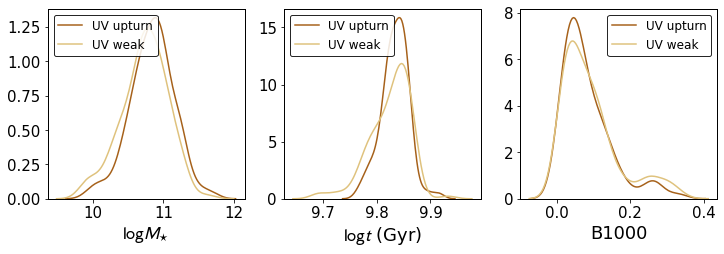

In [13]:
plt.rcParams.update(plotpars_3cols)
plt.subplot(1, 3, 1)
sns.kdeplot(uv_upturn['logmstar'], color=palette[1], label='UV upturn')
sns.kdeplot(uv_weak['logmstar'], color=palette[0], label='UV weak')
plt.legend(loc='upper left')
plt.xlabel(r"$\log M_{\star}$")

plt.subplot(1, 3, 2)
sns.kdeplot(uv_upturn['logage'], color=palette[1], label='UV upturn')
sns.kdeplot(uv_weak['logage'], color=palette[0], label='UV weak')
plt.legend(loc='upper left')
plt.xlabel(r"$\log t}$ (Gyr)")

plt.subplot(1, 3, 3)
sns.kdeplot(uv_upturn['B1000'], color=palette[1], label='UV upturn')
sns.kdeplot(uv_weak['B1000'], color=palette[0], label='UV weak')
plt.legend(loc='upper right')
plt.xlabel(r"B1000")

plt.show()

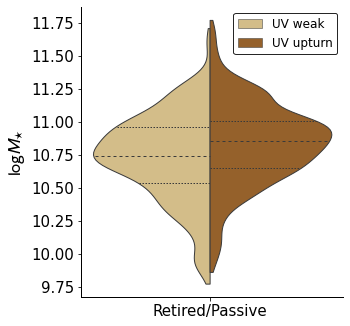

In [14]:
plt.rcParams.update(plotpars_3cols)
vplot1 = sns.catplot(x='WHAN_CLASS', y='logmstar', hue='UV_CLASS_YI2011', data=uv_redseq_retpassive, 
                     split=True, kind='violin', inner="quart", 
                     palette={"UV_UPTURN": palette[1], "UV_WEAK": palette[0]}, bw=.3, cut=1, linewidth=1., 
                     x_order=['UV_UPTURN','UV_WEAK'], legend_out=False, figsize=(20,4))
leg = vplot1.axes.flat[0].get_legend()
leg.set_title(None)
new_labels = ['UV weak', 'UV upturn']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

plt.ylabel(r"$\log M_{\star}$")
plt.xlabel(r"")

plt.show()

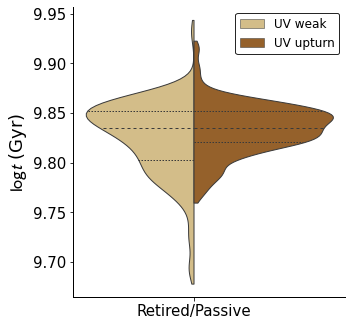

In [15]:
plt.rcParams.update(plotpars_3cols)
vplot1 = sns.catplot(x='WHAN_CLASS', y='logage', hue='UV_CLASS_YI2011', data=uv_redseq_retpassive, 
                     split=True, kind='violin', inner="quart", 
                     palette={"UV_UPTURN": palette[1], "UV_WEAK": palette[0]}, bw=.3, cut=1, linewidth=1., 
                     x_order=['UV_UPTURN','UV_WEAK'], legend_out=False, figsize=(20,4))
leg = vplot1.axes.flat[0].get_legend()
leg.set_title(None)
new_labels = ['UV weak', 'UV upturn']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

plt.ylabel(r"$\log t$ (Gyr)")
plt.xlabel(r"")

plt.show()

## Creating sub dataframes only with the parameters to be matched (i.e. mass, redshift)

In [16]:
reference = uv_upturn.filter(items=['Z', 'logmstar'], axis=1)

In [17]:
target = uv_weak.filter(items=['Z', 'logmstar'], axis=1)

## Running PSM

In [18]:
psm = psm(target_df=target, reference_df=reference)

In [19]:
print(psm)

          Z  logmstar
0   0.17015  10.85820
1   0.12357  10.48348
2   0.14638  10.66280
3   0.13693  10.29410
4   0.24746  11.25379
..      ...       ...
82  0.20081  11.21408
83  0.22105  11.15371
84  0.22552  10.98748
85  0.13527  10.58511
86  0.11764  10.45664

[87 rows x 2 columns]


## Recovering the original dataset after psm

In [20]:
uvwk_size     = uv_weak['Z'].values.size
uvwk_psm_size = psm['Z'].values.size

In [21]:
psm_id = ['CATAID']
for i, j in zip(range(uvwk_size), range(uvwk_psm_size)):
    if (uv_weak['Z'].iloc[i] == psm['Z'].iloc[j]) & (uv_weak['logmstar'].iloc[i] == psm['logmstar'].iloc[j]):
        psm_id.append(uv_weak['CATAID'].iloc[i])
        print("redshifts are the same (following value should be zero):", 
              (uv_weak['Z'].iloc[i] - psm['Z'].iloc[j]))
    else:
        print("redshifts should not be the same (following value should not be zero):", 
              (uv_weak['Z'].iloc[i]- psm['Z'].iloc[j]))    

redshifts should not be the same (following value should not be zero): -0.031450000000000006
redshifts should not be the same (following value should not be zero): 0.041130000000000014
redshifts should not be the same (following value should not be zero): -0.05125999999999997
redshifts should not be the same (following value should not be zero): -0.01085999999999998
redshifts should not be the same (following value should not be zero): -0.07623999999999997
redshifts should not be the same (following value should not be zero): 0.07153
redshifts should not be the same (following value should not be zero): -0.05506999999999998
redshifts should not be the same (following value should not be zero): -0.008789999999999992
redshifts should not be the same (following value should not be zero): -0.06186999999999998
redshifts should not be the same (following value should not be zero): -0.009080000000000005
redshifts should not be the same (following value should not be zero): -0.0293800000000000

In [22]:
psm_id = ['CATAID']
uvwk_revert_idx = []
for i in range(uvwk_size):
    for j in range(uvwk_psm_size):
        if psm['Z'].iloc[j] == uv_weak['Z'].iloc[i]:
            if psm['logmstar'].iloc[j] == uv_weak['logmstar'].iloc[i]:
                psm_id.append(uv_weak['CATAID'].iloc[i])
                uvwk_revert_idx.append(i)
#                 print(psm['Z'].iloc[j], uv_weak['Z'].iloc[i])
#                 print(psm['logmstar'].iloc[j], uv_weak['logmstar'].iloc[i])
        else:
            continue

In [23]:
len(psm_id)

88

In [24]:
psm_id

['CATAID',
 594913,
 601015,
 611561,
 611561,
 611561,
 611561,
 623746,
 14926,
 14926,
 14926,
 15040,
 250615,
 250615,
 267010,
 272688,
 278774,
 299132,
 299132,
 319765,
 319765,
 319765,
 319765,
 319765,
 323278,
 323278,
 323278,
 343316,
 348010,
 382082,
 382082,
 382082,
 397040,
 397130,
 419476,
 419476,
 3860408,
 3888446,
 3888446,
 31592,
 31592,
 48561,
 48561,
 54640,
 54644,
 54644,
 63657,
 64081,
 64081,
 64158,
 78967,
 84295,
 84295,
 85679,
 85679,
 91600,
 91600,
 98073,
 105613,
 106766,
 106766,
 106766,
 106766,
 107237,
 107809,
 534813,
 534813,
 535469,
 537184,
 560509,
 568249,
 568249,
 568249,
 143221,
 143819,
 143894,
 143894,
 144798,
 145244,
 145244,
 145646,
 239670,
 239670,
 240001,
 240001,
 585358,
 585358,
 585358]

In [25]:
uvwk_revert_idx = np.unique(np.array(uvwk_revert_idx))
uvwk_revert_idx

array([  0,   1,   4,   6,   7,   8,  12,  13,  15,  17,  20,  21,  22,
        23,  24,  27,  31,  32,  33,  49,  52,  59,  61,  63,  64,  66,
        67,  68,  71,  72,  73,  74,  76,  78,  79,  80,  81,  82,  84,
        86,  89,  90,  97,  98,  99, 100, 101, 102, 114, 115, 117])

In [26]:
uv_weak.iloc[list(uvwk_revert_idx)]

,CATAID,OBJID_SDSSDR7,ALPHA_J2000,DELTA_J2000,KRON_RADIUS,PETRO_RADIUS,MAG_PETRO_u,MAGERR_PETRO_u,FLAGS_u,MAG_PETRO_g,...,MAG_ABSOLUTE_I,MAG_ABSOLUTE_Z,MAG_ABSOLUTE_Y,MAG_ABSOLUTE_J,MAG_ABSOLUTE_H,MAG_ABSOLUTE_K,UV_CLASS_YI2011,TYPE,BPT_CLASS,WHAN_CLASS
122,594913,588848899931242710,222.3814,-0.031320,3.50,4.62,20.4692,0.0377,2,18.8379,...,-21.929809,-22.346751,-21.905216,-22.018757,-21.694539,-21.484908,UV_WEAK,3,NaN,Retired/Passive
204,601015,588848900431282478,138.2987,0.273487,3.50,5.28,20.7083,0.0683,2,19.1439,...,-22.015853,-22.373200,-21.834502,-21.936577,-21.720451,-21.671633,UV_WEAK,3,NaN,Retired/Passive
398,611561,588848900451860633,185.2660,0.306512,3.50,4.62,21.4321,0.0773,2,19.1295,...,-22.168942,-22.383982,-21.976433,-22.044531,-21.674396,-21.735826,UV_WEAK,3,LINER,Retired/Passive
803,623746,588848900969005194,140.2268,0.735974,3.50,5.28,21.2805,0.1015,0,19.0778,...,-22.267569,-22.654730,-22.018936,-22.254960,-21.952036,-21.752979,UV_WEAK,3,NaN,Retired/Passive
967,14926,588848901000986793,213.3015,0.694600,3.50,4.62,20.9827,0.0636,0,19.1201,...,-22.500084,-22.844510,-22.415620,-22.597007,-22.374534,-22.431652,UV_WEAK,3,LINER,Retired/Passive
982,15040,588848901001248951,213.8470,0.838207,3.50,4.62,20.5331,0.0484,2,19.1585,...,-21.300421,-21.703081,-21.092417,-21.140999,-20.911043,-20.636452,UV_WEAK,3,NaN,Retired/Passive
1649,250615,587726015084364012,215.2646,2.054914,3.50,5.28,20.7861,0.0617,2,19.4349,...,-21.993622,-22.392895,-21.835008,-22.050784,-21.674063,-21.680437,UV_WEAK,3,NaN,Retired/Passive
2521,267010,587726016160268470,220.2140,2.799421,3.50,4.62,20.9457,0.0585,2,19.2399,...,-20.222474,-20.573465,-20.032761,-19.929279,-19.627911,-19.227116,UV_WEAK,3,NaN,Retired/Passive
2709,272688,587726031175024794,180.5456,1.441575,3.50,5.28,20.8145,0.0964,0,19.3625,...,-21.927955,-22.257915,-21.866924,-22.041726,-21.824038,-21.762313,UV_WEAK,3,Composite,Retired/Passive
2833,278774,587726031691383171,133.6441,0.848827,3.50,4.62,21.4801,0.0593,2,19.6425,...,-22.040999,-22.233231,-21.758520,-21.870338,-21.512323,-21.582000,UV_WEAK,3,NaN,Retired/Passive


In [27]:
# %matplotlib notebook

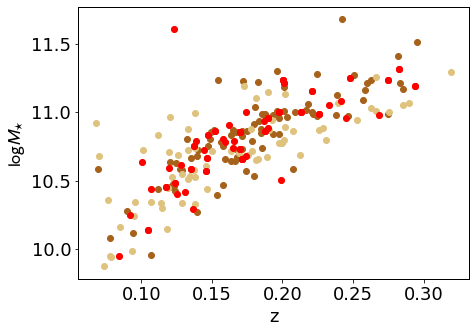

In [28]:
plt.rcParams.update(plotpars)

plt.scatter(y=uv_upturn['logmstar'], x=uv_upturn['Z'], c=palette[1])
plt.scatter(y=uv_weak['logmstar'], x=uv_weak['Z'], c=palette[0])
plt.scatter(y=psm['logmstar'], x=psm['Z'], c='red')
plt.xlabel("z")
plt.ylabel(r"$\log M_{\star}$")
plt.show()

In [3]:
nn?

In [ ]:
# to be continued
# many errors still in code